In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table_name = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [2]:
# Y is the target variable
Y = houses_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = houses_df[['overallqual','grlivarea', 'garagecars']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [27104.82597153    50.67421142 21298.95976754]

Intercept: 
 -98832.49325495961


In [3]:
# Checking error term is zero.

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -4.544981742558414e-12


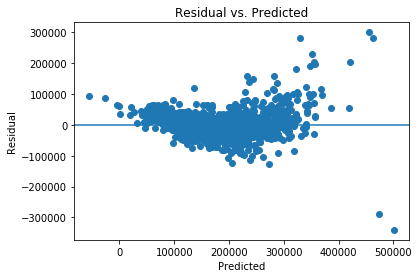

In [4]:
# Check homoscedascity

plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [5]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 378.583 and p value is 2.53e-84
Levene test statistic value is 414.195 and p value is 3.29e-86


In [8]:
# Check multicollinearity

X.corr()

,overallqual,grlivarea,garagecars
overallqual,1.000000,0.593007,0.600671
grlivarea,0.593007,1.000000,0.467247
garagecars,0.600671,0.467247,1.000000


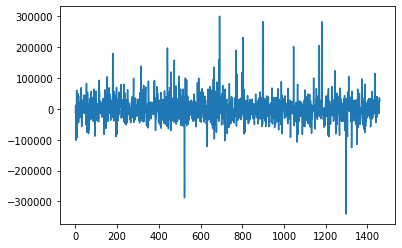

In [9]:
# Check that error terms are uncorrelated with one another¶
plt.plot(errors)
plt.show()

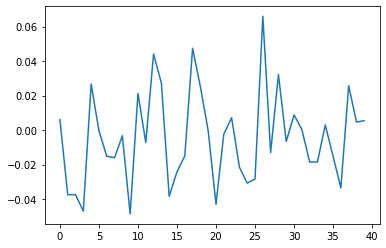

In [10]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()